In [28]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import community
from matplotlib import cm

In [2]:
#------------------------------------------------------------------------------------------------------
#                                 Trabajo Computacional 3
#------------------------------------------------------------------------------------------------------

# Primero creamos la red de delfines: agregamos los enlaces sin necesidad de agregar antes los nodos
mydolphins = nx.read_gml('dolphins.gml')

# Para agregar el dato del genero a partir del txt:
# creamos dos listas: una de nombres de delfines (nodos) y otra de los generos correspondientes
Gender = pd.read_csv('dolphinsGender.txt', sep='\t', header=None)
delfines = Gender[0] # nombres de delfines (nodos)
genero = Gender[1]   # genero de los delfines en el mismo orden que los nodos

# A cada uno de los nodos ya existentes en el grafo, se le agrega el genero
for d,g in zip(delfines,genero):
    mydolphins.add_node(d, gender=g)


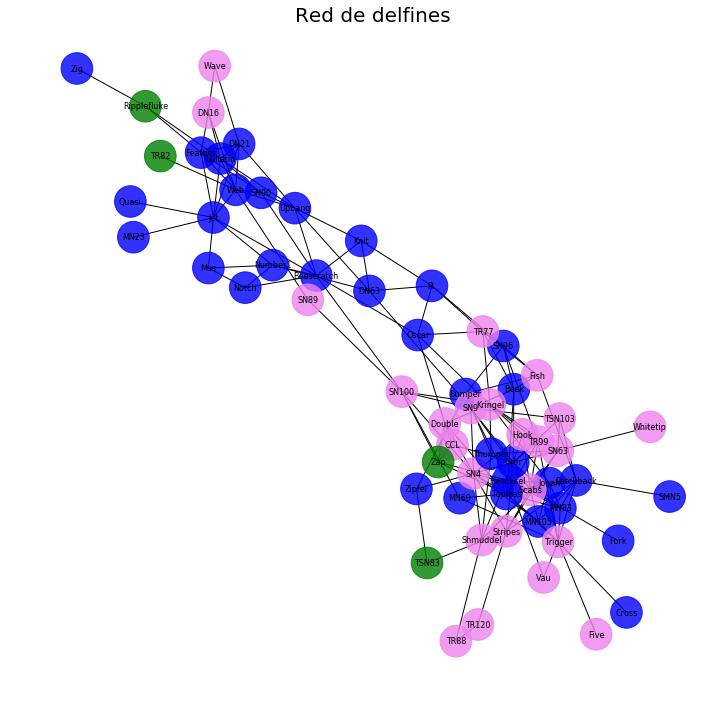

In [8]:
#------------------------------------------------------------------------------------------------------
#Grafico Original
#------------------------------------------------------------------------------------------------------
width=12
height=12
fig=plt.figure(figsize=(width, height))
fig.patch.set_facecolor('white')
pos = nx.spring_layout(mydolphins)

#Nodos
nx.draw_networkx_nodes(mydolphins,
                       pos,
                       nodelist=mydolphins.nodes(),
                       node_color=["blue" if g=="m" else "violet" if g=="f" else "green" for g in nx.get_node_attributes(mydolphins, "gender").values()],
                       with_labels=True,node_size=1000,alpha=0.8)

#Enlaces
nx.draw_networkx_edges(mydolphins,pos,width=1.0,alpha=1)

#Etiquetas
nx.draw_networkx_labels(mydolphins,pos,font_size=8)
plt.title('Red de delfines',fontsize=20)
plt.axis('off')
plt.show()

In [24]:
#------------------------------------------------------------------------------------------------------
#Metodo: Louvain
#------------------------------------------------------------------------------------------------------
G=mydolphins.copy()
part = community.best_partition(G) # diccionario con nodo - comunidad (nro)

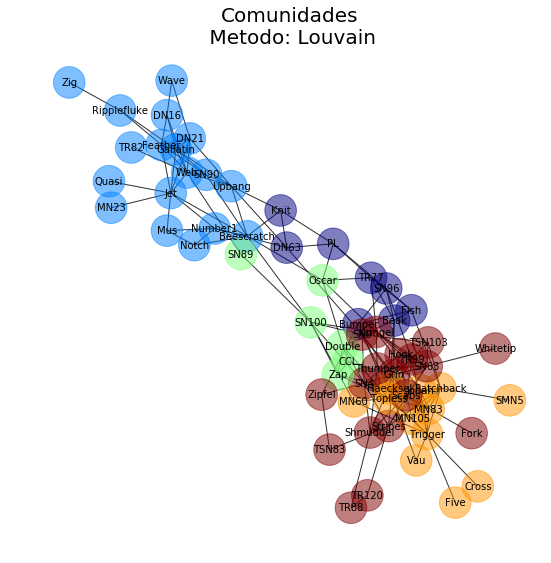

In [68]:
com=list(part.values())#lista de comunidades desordenada y repetidas
L=len(com)#cantidad de nodos
a=np.unique(com)
l=len(a) #cantidad de comunidades
delfines = G.nodes()

colores_com = np.linspace(0,1,l) # quiero n colores
colores = [ cm.jet(x) for x in colores_com ] # transformo en colores del colormap que quiera


plt.figure(figsize=(9,9))

nx.draw_networkx_nodes(G,pos,
                       node_color = [colores[g] for g in part.values()],
                       node_size=1000,
                       alpha=0.5)

nx.draw_networkx_edges(G,pos,width=1.0,
                   node_size=50,
                   alpha=0.8)
#Etiquetas
nx.draw_networkx_labels(mydolphins,pos,font_size=10)
plt.title('Comunidades\n Metodo: Louvain',fontsize=20)
plt.axis('off')

plt.show()





